In [1]:
# scarico le librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scrapy as sc
import humanize

# PULIZIA file RIPARTIZIONI
with open('ripartizione-geografica_python.txt', 'r', encoding="windows-1252") as file:
    lines = file.readlines()
column_names = lines[0].strip().split('\t')
data = []
for line in lines[1:]:
    values = line.strip().split('\t')
    row_data = dict(zip(column_names, values))
    data.append(row_data)
df = pd.DataFrame(data)
df.to_csv('ripartizione-geografica_python.csv', index=False)
Ripartizione_geografica = pd.read_csv('ripartizione-geografica_python.csv')
Ripartizione_geografica.set_index('Codice Regione', inplace=True)
print(Ripartizione_geografica)

Ripartizione_geografica.to_csv('ripartizione-geografica_pulita.csv')

# PULIZIA file REGIONI
file = "covid19_italy_region_python.csv"
dati = pd.read_csv(file)

dati['TestsPerformed'] = dati['TestsPerformed'].fillna(0) # Sostituzione valori NaN con 0 alla colonna test
dati['Date'] = pd.to_datetime(dati['Date']) # Data in formato data
dati.set_index('SNo', inplace=True) # Impostazione indice
dati.drop('Country', axis=1, inplace=True) # Cancella la colonna country, in quanto inutile

# Per pulizia si rinominano le colonne
nuove_colonne = {
    'HospitalizedPatients': 'In ospedale',
    'CurrentPositiveCases': 'Positivi',
    'IntensiveCarePatients': 'Ter_intensiva',
    'RegionCode': 'Code',
    'HomeConfinement': 'In Casa',
    'TestsPerformed': 'Test'
}

dati.rename(columns=nuove_colonne, inplace=True)


df_regioni = pd.DataFrame(dati)                             #Rinomino il DataFrame come df_regioni

print(df_regioni)                                           #Stampo il DataFrame rinominato

df_regioni.to_csv('covid19_italy_region_pulito.csv')        #Salvo nuovo file 

# Pulizia PROVINCE
province = pd.read_csv("./covid19_italy_province_python.csv")
df_province = pd.DataFrame(province)

df_province.drop("Country", axis=1, inplace=True)            # Rimuovo la colonna "Country" direttamente dal DataFrame `province`

df_province = df_province.dropna()                           # Rimuovo i NaN dal DataFrame

df_province = df_province.sort_values(by="RegionName")       # Ordino il DataFrame in ordine alfabetico in base alle regioni

print(df_province.describe())                               # Calcolo tutte le informazioni generali che possono essere utili

df_province.to_csv('covid19_italy_province_pulito.csv')

#PULIZIA file COMUNI 

try:
    # Carico il file Excel
    df_comuni = pd.read_excel('Comuni_python.xlsx')
    print("Caricamento del file Excel completato con successo!")
except Exception as e:
    print("Si è verificato un errore durante il caricamento del file Excel:", e)

print("Informazioni sul DataFrame prima della pulizia:")
print(df_comuni.info())

# Seleziono solo le colonne rilevanti per l'analisi
colonne_rilevanti = ['Denominazione', 'Regione', 'Sigla automobilistica', 'Popolazione2011']
df_comuni = df_comuni[colonne_rilevanti]

# Ora faccio la gestione dei valori mancanti
# Conto i valori mancanti per ogni colonna
valori_mancanti = df_comuni.isnull().sum()
print("\nValori mancanti per ogni colonna:")
print(valori_mancanti)

# Elimino solo le righe con valori mancanti nelle colonne rilevanti
df_comuni.dropna(subset=colonne_rilevanti, inplace=True)

# Rimuovo la colonna senza nome, se presente
if 'Unnamed: 1' in df_comuni.columns:
    df_comuni.drop(columns=['Unnamed: 1'], inplace=True)

# Controllo se ci sono righe duplicate
righe_duplicate = df_comuni[df_comuni.duplicated()]
print("\nRighe duplicate:")
print(righe_duplicate)

# Visualizzo informazioni sul DataFrame dopo la pulizia
print("\nInformazioni sul DataFrame dopo la pulizia:")
print(df_comuni.info())

# Visualizzo statistiche di base per le colonne numeriche dopo la pulizia
print("\nStatistiche di base per le colonne numeriche dopo la pulizia:")
print(df_comuni.describe())

# Esegui il metodo describe() sul DataFrame
statistiche_base = df_comuni.describe()

df_comuni.to_csv('comuni_puliti.csv', index=False)  # index=False per non includere l'indice nel file CSV


               Ripartizione geografica                       Regione
Codice Regione                                                      
1                           Nord-ovest                      Piemonte
2                           Nord-ovest  Valle d'Aosta/Vallée d'Aoste
3                           Nord-ovest                     Lombardia
4                             Nord-est  Trentino-Alto Adige/Südtirol
5                             Nord-est                        Veneto
6                             Nord-est         Friuli-Venezia Giulia
7                           Nord-ovest                       Liguria
8                             Nord-est                Emilia-Romagna
9                               Centro                       Toscana
10                              Centro                        Umbria
11                              Centro                        Marche
12                              Centro                         Lazio
13                                

In [2]:

# Estrai i valori di interesse
count = statistiche_base.loc['count', 'Popolazione2011']
mean = statistiche_base.loc['mean', 'Popolazione2011']
std = statistiche_base.loc['std', 'Popolazione2011']
min_value = statistiche_base.loc['min', 'Popolazione2011']
quartile_25 = statistiche_base.loc['25%', 'Popolazione2011']
quartile_50 = statistiche_base.loc['50%', 'Popolazione2011']
quartile_75 = statistiche_base.loc['75%', 'Popolazione2011']
max_value = statistiche_base.loc['max', 'Popolazione2011']

# Formattazione dei dati utilizzando la libreria humanize
formatted_count = humanize.intword(count)
formatted_mean = humanize.intcomma(round(mean, 2))
formatted_std = humanize.intcomma(round(std, 2))
formatted_min_value = humanize.intword(min_value)
formatted_quartile_25 = humanize.intword(quartile_25)
formatted_quartile_50 = humanize.intword(quartile_50)
formatted_quartile_75 = humanize.intword(quartile_75)
formatted_max_value = humanize.intword(max_value)

# Stampare i dati formattati
print("Statistiche di base per le colonne numeriche dopo la pulizia:")
print(f"Count: {formatted_count}")
print(f"Mean: {formatted_mean}")
print(f"Std: {formatted_std}")
print(f"Min: {formatted_min_value}")
print(f"25th Percentile: {formatted_quartile_25}")
print(f"50th Percentile: {formatted_quartile_50}")
print(f"75th Percentile: {formatted_quartile_75}")
print(f"Max: {formatted_max_value}")




Statistiche di base per le colonne numeriche dopo la pulizia:
Count: 7.8 thousand
Mean: 7,207.62
Std: 38,847.81
Min: 30
25th Percentile: 1.0 thousand
50th Percentile: 2.5 thousand
75th Percentile: 6.1 thousand
Max: 2.6 million


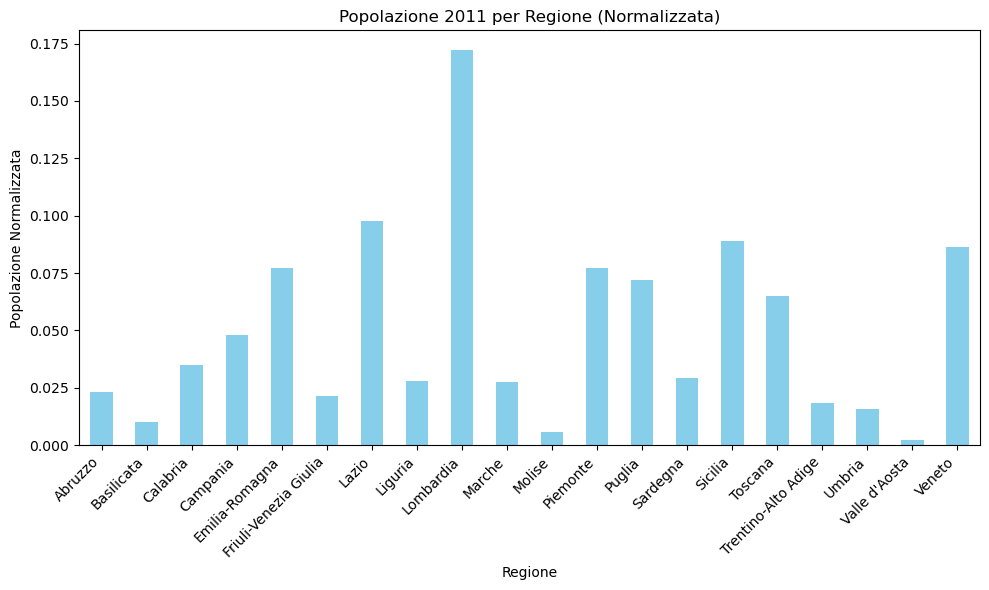

In [23]:
#Popolazione per Regione nel 2011
# Raggruppo i dati per regione e calcolo la popolazione totale di ciascuna regione
popolazione_per_regione = df_comuni.groupby('Regione')['Popolazione2011'].sum()

# Normalizzo la popolazione per regione
popolazione_normalizzata = popolazione_per_regione / popolazione_per_regione.sum()

# Creo l'istogramma
plt.figure(figsize=(10, 6))
popolazione_normalizzata.plot(kind='bar', color='skyblue')
plt.title('Popolazione 2011 per Regione (Normalizzata)')
plt.xlabel('Regione')
plt.ylabel('Popolazione Normalizzata')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [4]:
#IMPORTO FILE PULITI

# Importa il file CSV dei comuni puliti
df_comuni = pd.read_csv('comuni_puliti.csv')

# Importa il file CSV delle province pulite
df_province = pd.read_csv('covid19_italy_province_pulito.csv')

# Importa il file CSV della ripartizione geografica pulita
df_ripartizione = pd.read_csv('ripartizione-geografica_pulita.csv')

# Importa il file CSV delle regioni pulite
df_regioni = pd.read_csv('covid19_italy_region_pulito.csv')

# Descrizione dei dati per il DataFrame dei comuni
print("Descrizione dei dati per il DataFrame dei comuni:")
print(df_comuni)

# Descrizione dei dati per il DataFrame delle province
print("\nDescrizione dei dati per il DataFrame delle province:")
print(df_province)

# Descrizione dei dati per il DataFrame della ripartizione geografica
print("\nDescrizione dei dati per il DataFrame della ripartizione geografica:")
print(df_ripartizione)

# Descrizione dei dati per il DataFrame delle regioni
print("\nDescrizione dei dati per il DataFrame delle regioni:")
print(df_regioni)

# Rinomina la colonne ripetute
df_regioni.rename(columns={'TotalPositiveCases': 'TotalPositiveCasesRegioni'}, inplace=True)
df_province.rename(columns={'TotalPositiveCases': 'TotalPositiveCasesProvince'}, inplace=True)
df_regioni.rename(columns={'Date': 'DateRegioni'}, inplace=True)
df_province.rename(columns={'Date': 'DateProvince'}, inplace=True)

# Converti la colonna delle date in datetime
df_regioni['DateRegioni'] = pd.to_datetime(df_regioni['DateRegioni'])
df_province['DateProvince'] = pd.to_datetime(df_province['DateProvince'])






Descrizione dei dati per il DataFrame dei comuni:
        Denominazione   Regione Sigla automobilistica  Popolazione2011
0               Agliè  Piemonte                    TO           2644.0
1             Airasca  Piemonte                    TO           3819.0
2        Ala di Stura  Piemonte                    TO            462.0
3     Albiano d'Ivrea  Piemonte                    TO           1791.0
4              Almese  Piemonte                    TO           6303.0
...               ...       ...                   ...              ...
7816       Villaputzu  Sardegna                    SU           4836.0
7817       Villasalto  Sardegna                    SU           1127.0
7818      Villasimius  Sardegna                    SU           3420.0
7819         Villasor  Sardegna                    SU           6857.0
7820    Villaspeciosa  Sardegna                    SU           2407.0

[7821 rows x 4 columns]

Descrizione dei dati per il DataFrame delle province:
       Unnamed: 0 

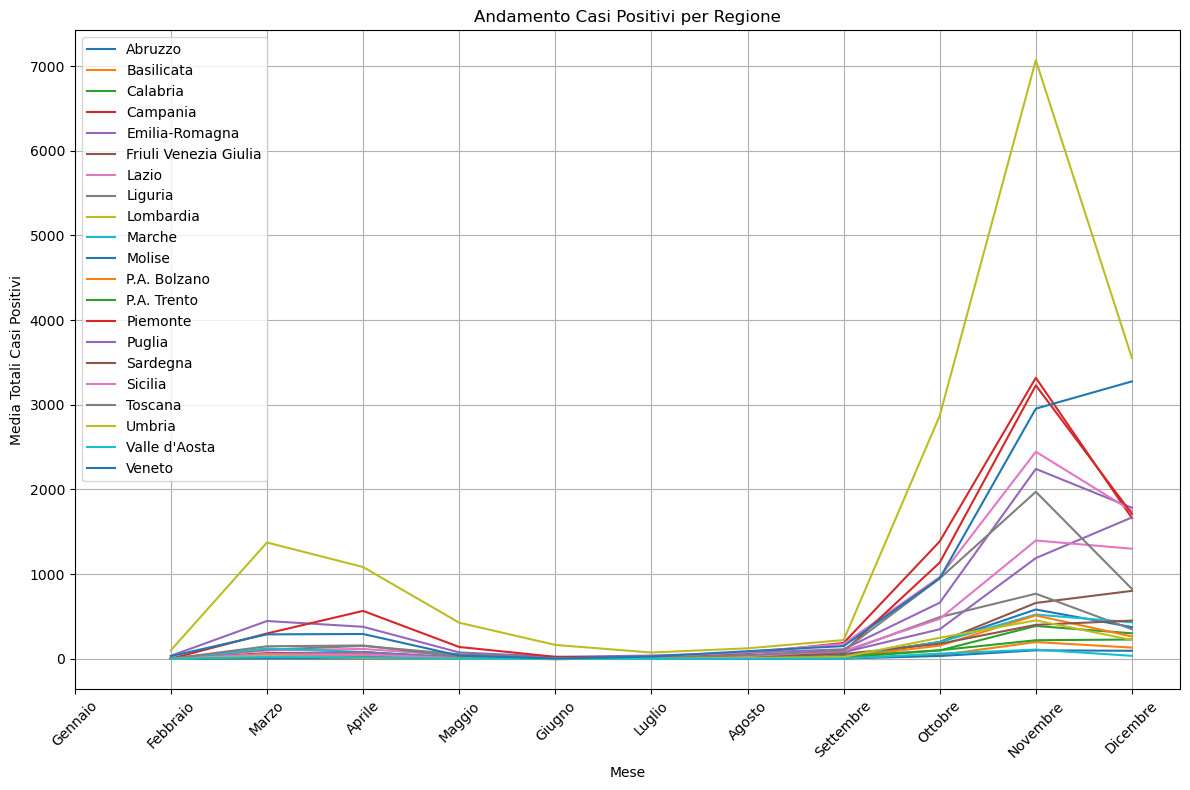

In [24]:
#Andamento mensile dei totali casi positivi
#Aggrega i dati per regione e mese e calcola la media dei totali dei casi positivi regionali per ogni mese
df_regioni['DateRegioni'] = pd.to_datetime(df_regioni['DateRegioni'])
df_regioni['Month'] = df_regioni['DateRegioni'].dt.month
media_totali_per_mese = df_regioni.groupby(['RegionName', 'Month'])['NewPositiveCases'].mean().reset_index()

# Costruzione grafico
plt.figure(figsize=(12, 8))
for regione in media_totali_per_mese['RegionName'].unique():
    dati_regione = media_totali_per_mese[media_totali_per_mese['RegionName'] == regione]
    plt.plot(dati_regione['Month'], dati_regione['NewPositiveCases'], label=regione)

# Impostazioni aggiuntive del grafico
plt.title('Andamento Casi Positivi per Regione')
plt.xlabel('Mese')
plt.ylabel('Media Totali Casi Positivi')
plt.xticks(range(1, 13), ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()


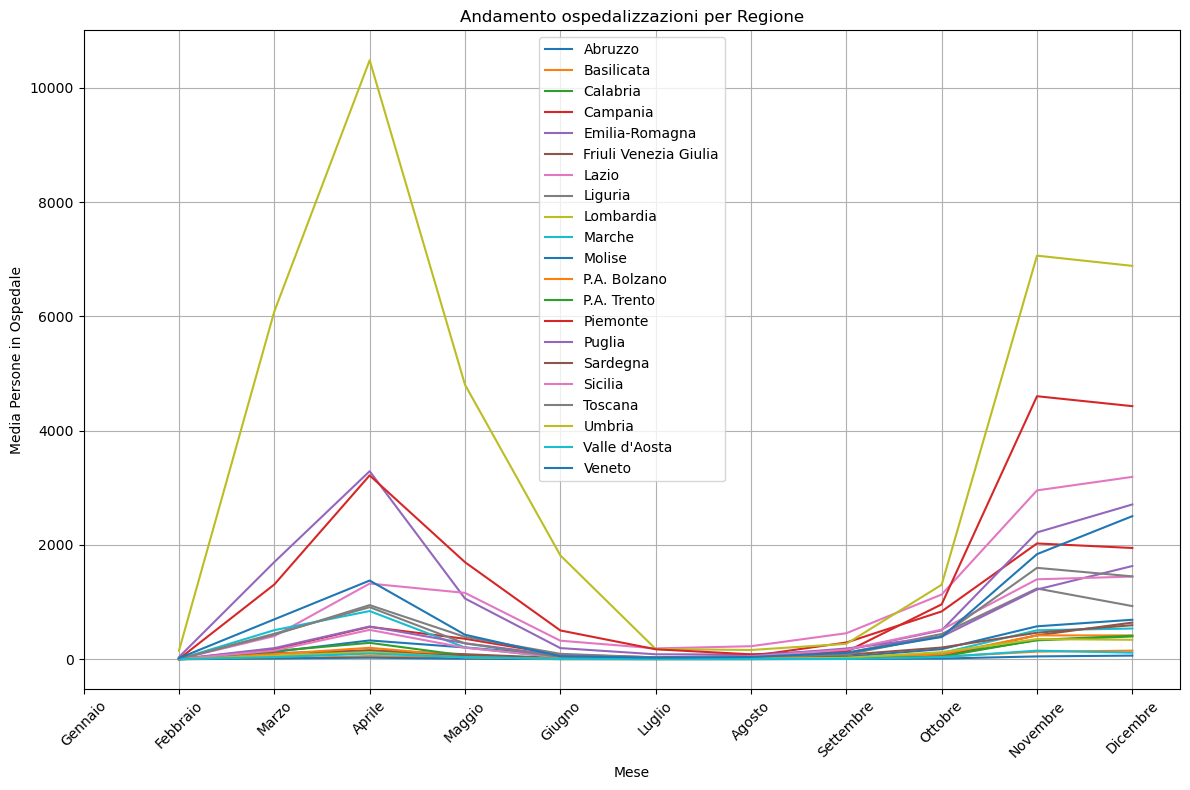

In [27]:

# Aggrega i dati per regione e mese e calcola la media del numero di persone in ospedale per ogni mese
df_regioni['DateRegioni'] = pd.to_datetime(df_regioni['DateRegioni'])
df_regioni['Month'] = df_regioni['DateRegioni'].dt.month
media_ospedalizzati_per_mese = df_regioni.groupby(['RegionName', 'Month'])['In ospedale'].mean().reset_index()

# Grafico degli andamenti mensili del numero medio di persone in ospedale per regione
plt.figure(figsize=(12, 8))
for regione in media_ospedalizzati_per_mese['RegionName'].unique():
    dati_regione = media_ospedalizzati_per_mese[media_ospedalizzati_per_mese['RegionName'] == regione]
    plt.plot(dati_regione['Month'], dati_regione['In ospedale'], label=regione)

# Impostazioni aggiuntive del grafico
plt.title('Andamento ospedalizzazioni per Regione')
plt.xlabel('Mese')
plt.ylabel('Media Persone in Ospedale')
plt.xticks(range(1, 13), ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()


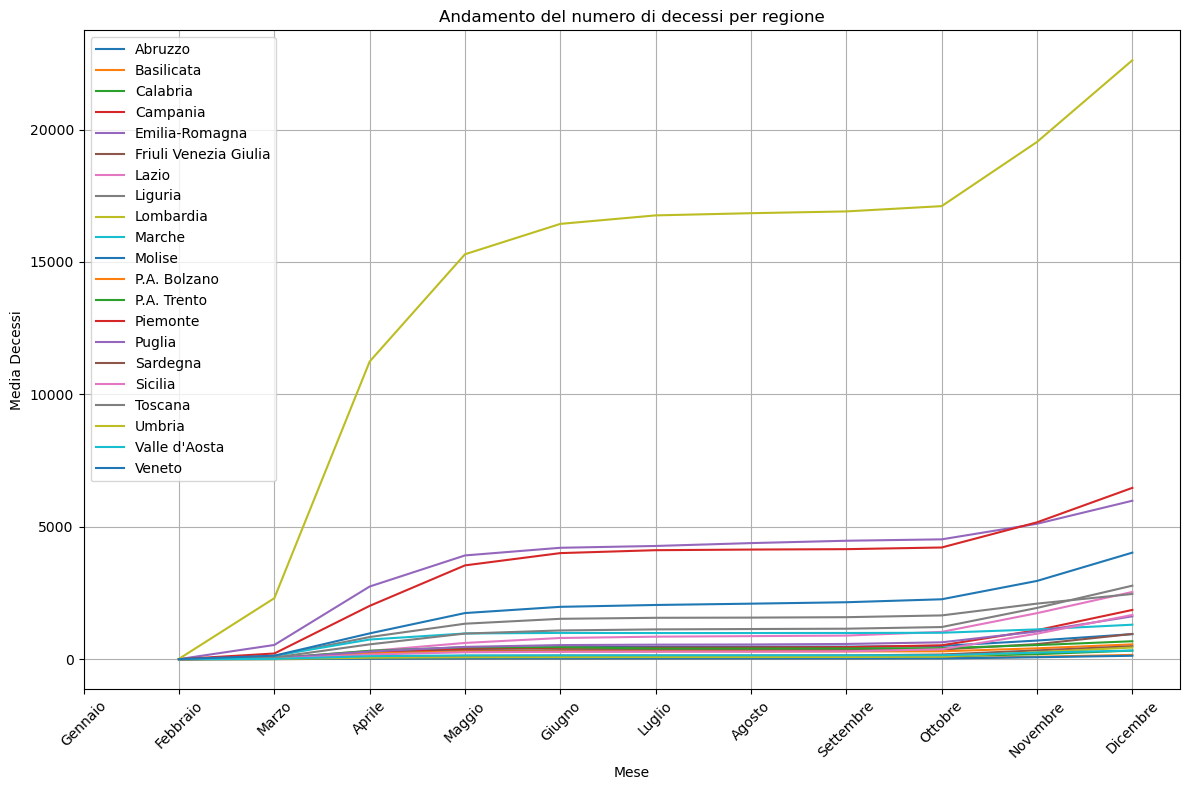

In [28]:
# Aggrega i dati per regione e mese e calcola la media del numero di decessi 
media_decessi_per_mese = df_regioni.groupby(['RegionName', 'Month'])['Deaths'].mean().reset_index()

# Grafico degli andamenti mensili del numero medio di decessi per regione
plt.figure(figsize=(12, 8))
for regione in media_decessi_per_mese['RegionName'].unique():
    dati_regione = media_decessi_per_mese[media_decessi_per_mese['RegionName'] == regione]
    plt.plot(dati_regione['Month'], dati_regione['Deaths'], label=regione)

# Impostazioni aggiuntive del grafico
plt.title('Andamento del numero di decessi per regione')
plt.xlabel('Mese')
plt.ylabel('Media Decessi')
plt.xticks(range(1, 13), ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()


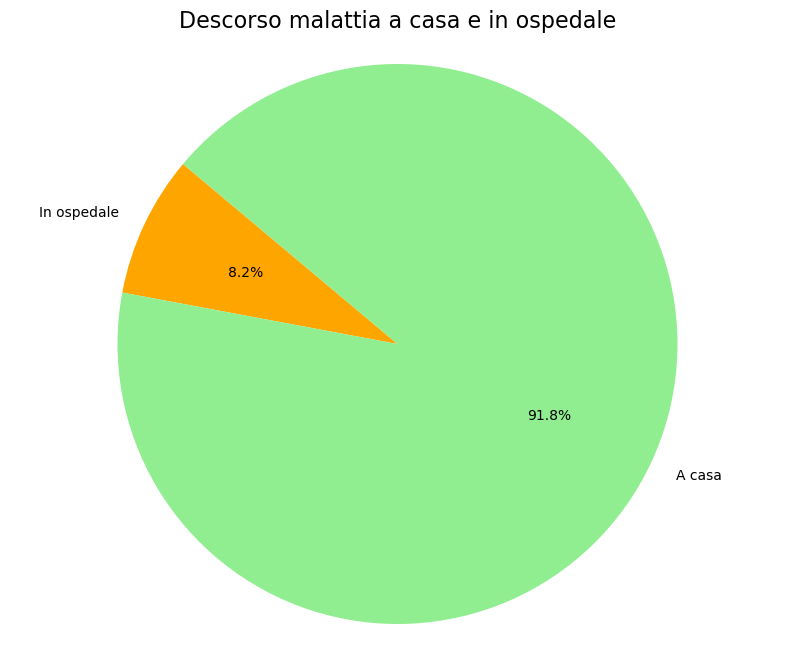

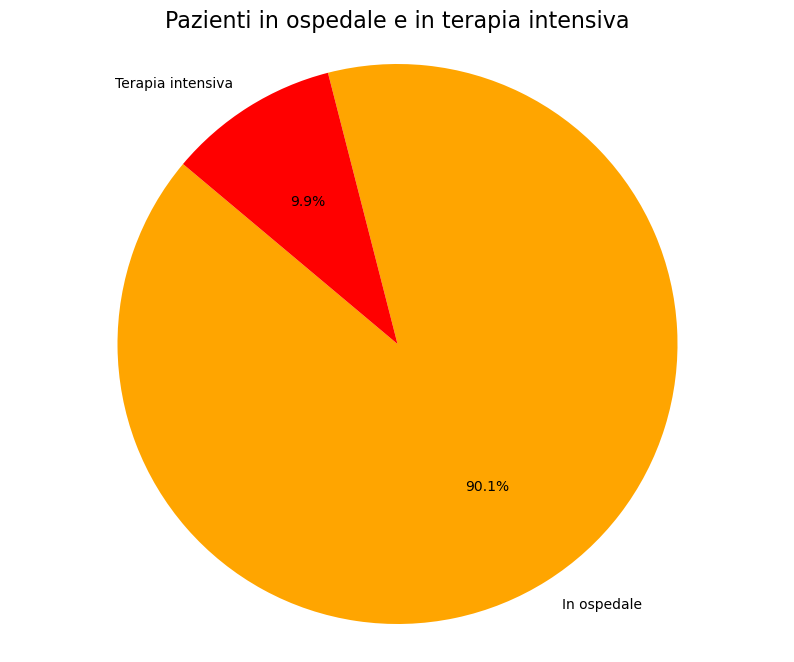

In [8]:
# Calcola il totale dei casi
totale_casi = df_regioni['In ospedale'].sum() + df_regioni['In Casa'].sum()

# Calcola la percentuale di casi in ospedale e a casa rispetto al totale
percentuale_in_ospedale = (df_regioni['In ospedale'].sum() / totale_casi) * 100
percentuale_in_casa = (df_regioni['In Casa'].sum() / totale_casi) * 100

# Etichette per le fette del grafico a torta
labels = ['In ospedale', 'A casa']

# Valori delle fette del grafico a torta
sizes = [percentuale_in_ospedale, percentuale_in_casa]

# Colori delle fette
colors = ['orange', 'lightgreen']

# Crea il grafico a torta
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Impostazioni aggiuntive
plt.title('Descorso malattia a casa e in ospedale', fontsize=16)
plt.axis('equal')  # Assicura che il grafico sia circolare

# Mostra il grafico
plt.show()

# Calcolo la somma delle colonne 'In ospedale' e 'Ter_intensiva'
total_in_ospedale = df_regioni['In ospedale'].sum()
total_ter_intensiva = df_regioni['Ter_intensiva'].sum()

# Creo una lista con i totali
totals = [total_in_ospedale, total_ter_intensiva]

# Creo le etichette per le fette del grafico a torta
labels = ['In ospedale','Terapia intensiva']

# Colori delle fette
colors = ['orange', 'red']

# Creo il grafico a torta
plt.figure(figsize=(10, 8))
plt.pie(totals, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Impostazione del titolo del grafico
plt.title('Pazienti in ospedale e in terapia intensiva', fontsize=16)

# Visualizzazione del grafico
plt.axis('equal')  # Assicura che il grafico sia disegnato come un cerchio
plt.show()


                     NewPositiveCases      Test
Date                                           
2020-02-24 18:00:00          0.003503  0.000000
2020-02-25 18:00:00          0.000367  0.000000
2020-02-26 18:00:00          0.000000  0.000000
2020-02-27 18:00:00          0.004213  0.000000
2020-02-28 18:00:00          0.003919  0.000000
...                               ...       ...
2020-12-02 17:00:00          0.505364  0.974626
2020-12-03 17:00:00          0.566995  0.981849
2020-12-04 17:00:00          0.588404  0.988003
2020-12-05 17:00:00          0.513766  0.994483
2020-12-06 17:00:00          0.460734  1.000000

[287 rows x 2 columns]


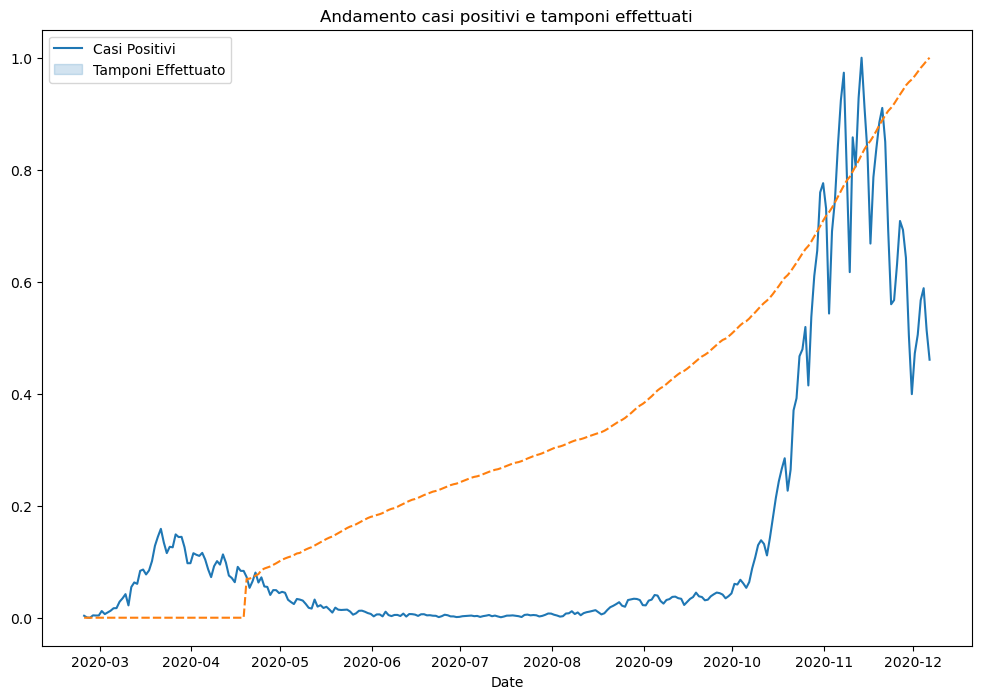

In [9]:
#Definisco funzione min max
def min_max(data):
    min_value = data.min()
    max_value = data.max()
    return (data - min_value) / (max_value - min_value)
   
#Raggruppamento dei valori per data
d1 = dati.groupby('Date')[["NewPositiveCases", "Test"]].sum()

#Faccio la standardizzazione min max sulle colonne interessate
d1[['NewPositiveCases','Test']] = min_max(d1[['NewPositiveCases','Test']])


#stampo il grafico
print(d1)
plt.figure(figsize=(12, 8))
sns.lineplot(data = d1[["NewPositiveCases","Test"]], palette="tab10", linewidth=1.5)
plt.title('Andamento casi positivi e tamponi effettuati')
plt.legend(labels = ['Casi Positivi','Tamponi Effettuato'])
plt.show()

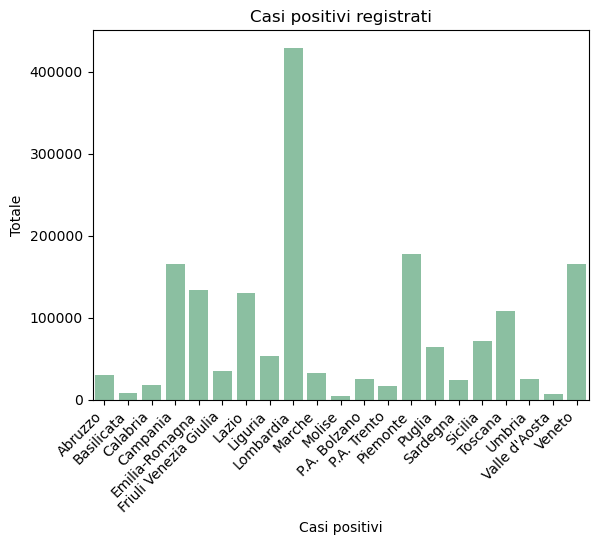

In [10]:
#Raggruppo per regione
dati_raggruppati = df_regioni.groupby('RegionName')["NewPositiveCases"].sum().reset_index()


#Creiamo il grafico
sns.barplot(x="RegionName", y="NewPositiveCases", data=dati_raggruppati, color="#82c89f")
plt.title('Casi positivi registrati')
plt.xlabel('Casi positivi')
plt.ylabel('Totale')
plt.xticks(rotation=45, ha = "right")
plt.show()

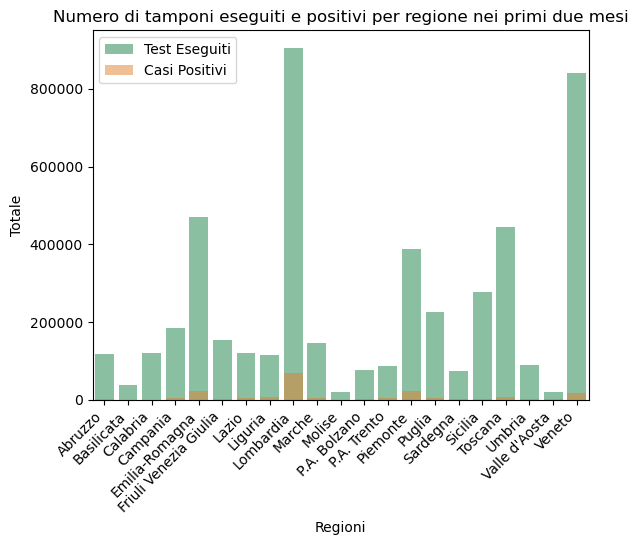

In [11]:
# Imposta l'intervallo di date per i primi due mesi
inizio_primi_due_mesi = '2020-02-24'
fine_primi_due_mesi = '2020-04-24'

# Filtra i dati per il periodo dei primi due mesi
dati_primi_due_mesi = df_regioni[df_regioni['DateRegioni'].between(inizio_primi_due_mesi, fine_primi_due_mesi)]

# Raggruppa i dati per regione in quel periodo
dati_raggruppati = dati_primi_due_mesi.groupby('RegionName')[['Test', 'NewPositiveCases']].sum().reset_index()

# Visualizza il grafico a barre
sns.barplot(x="RegionName", y="Test", data=dati_raggruppati, color="#82c89f", label="Test Eseguiti")
sns.barplot(x="RegionName", y="NewPositiveCases", data=dati_raggruppati, color="#ff7f0e", label="Casi Positivi", alpha=0.5)
plt.title('Numero di tamponi eseguiti e positivi per regione nei primi due mesi')
plt.xlabel('Regioni')
plt.ylabel('Totale')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()


Correlation coefficient: 0.7233062999750133


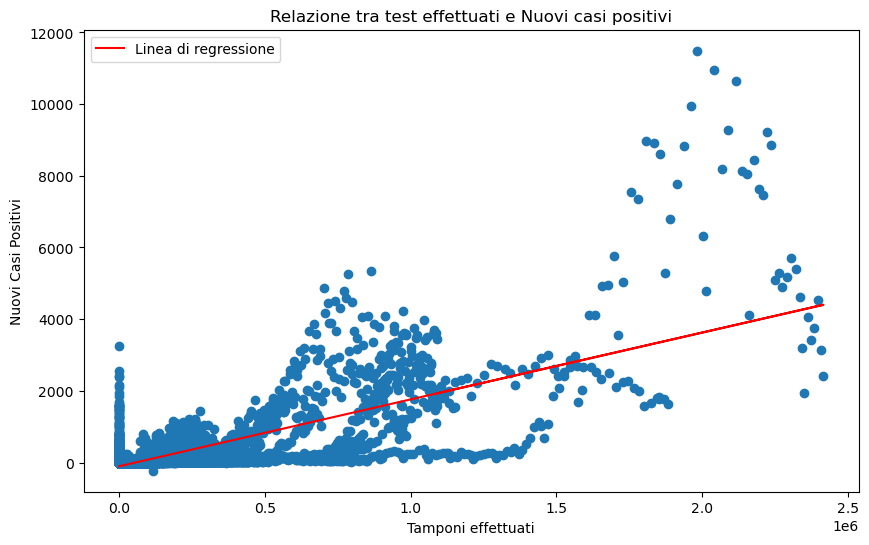

In [12]:
# Grafico a dispersione per esaminare la relazione tra il numero di test e il numero di nuovi casi positivi
plt.figure(figsize=(10, 6))
plt.scatter(df_regioni['Test'], df_regioni['NewPositiveCases'])
plt.xlabel('Tamponi effettuati')
plt.ylabel('Nuovi Casi Positivi')
plt.title('Relazione tra test effettuati e Nuovi casi positivi')
# Calcolo della correlazione
x = df_regioni['Test']
y = df_regioni['NewPositiveCases']
corr = np.corrcoef(x, y)[0, 1]
print("Correlation coefficient:", corr)
# Calcolo della regressione lineare
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
plt.plot(x, poly(x), color='r', label='Linea di regressione')
plt.legend()
plt.show()

Text(0, 0.5, 'quantità di casi')

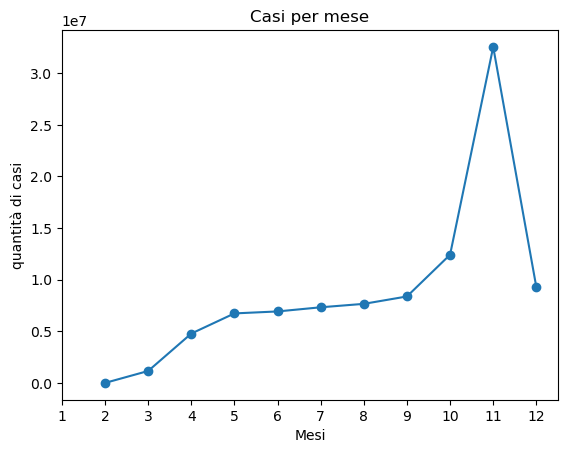

In [13]:

df_province["mese"] = df_province["DateProvince"].dt.month
casi_per_mese = df_province.groupby("mese")["TotalPositiveCasesProvince"].sum()
plt.plot(casi_per_mese.index, casi_per_mese.values, marker="o")
plt.title("Casi per mese")
plt.xticks(range(1,13))
plt.xlabel("Mesi")
plt.ylabel("quantità di casi")

In [14]:
# Calcola il numero totale di deceduti
totale_morti = df_regioni['Deaths'].sum()
totale_test = df_regioni['Test'].sum()
totale_casi = df_regioni['NewPositiveCases'].sum()
# Stampare il risultato
print("Numero totale deceduti:", totale_morti)
print("Numero tamponi:", totale_test)
print("Numero casi:", totale_casi)

casi_negativi = totale_test - totale_casi
print("casi negativi",casi_negativi)
percentuale_negativi = (casi_negativi / totale_test) * 100
print(percentuale_negativi)

totale_popolazione = df_comuni['Popolazione2011'].sum()
percentuale_deceduti = (totale_morti / totale_popolazione) * 100
percentuale_deceduti_sui_positivi = (totale_morti / totale_casi) * 100
print(percentuale_deceduti)

# Calcola il numero totale di guariti
numero_guariti = df_regioni['Recovered'].sum()
print("Numero totale di guariti:", numero_guariti)



Numero totale deceduti: 8886032
Numero tamponi: 1267114790.0
Numero casi: 1729061
casi negativi 1265385729.0
99.8635434600207
15.763539946841263
Numero totale di guariti: 56279239


In [15]:
# MAPPA ITALIA
nuovi_casi_per_regione = df_regioni.groupby('RegionName')['NewPositiveCases'].sum()
nuovi_casi_per_regione_sorted = nuovi_casi_per_regione.sort_values()
nuovi_casi_per_regione_sorted.to_csv('nuovi_casi_per_regione_sorted.csv', header=True)

print("Dati salvati in nuovi_casi_per_regione_sorted.csv")


Dati salvati in nuovi_casi_per_regione_sorted.csv


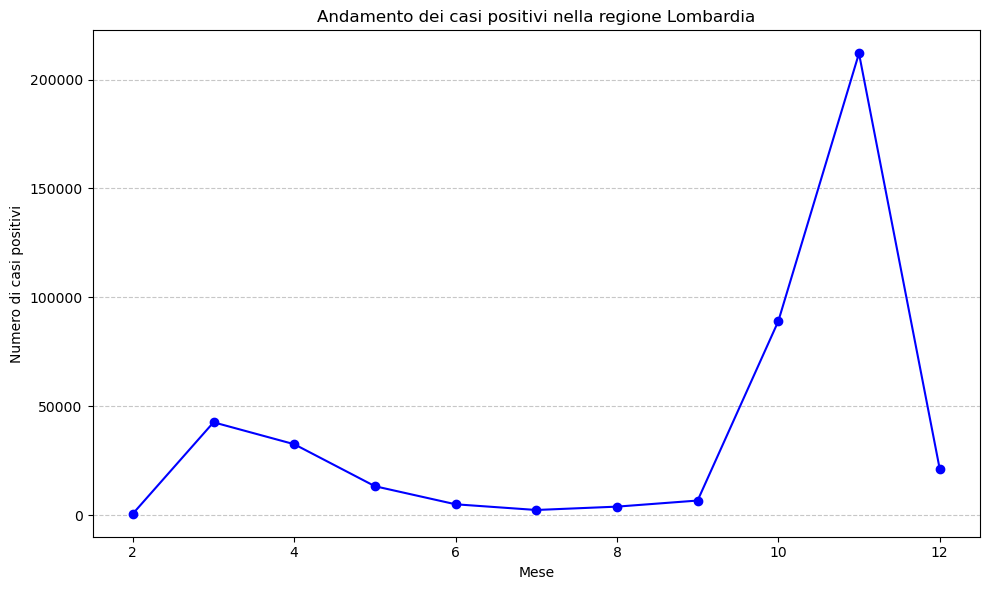

In [16]:

# ANDAMENTO CASI POSITIVI IN LOMBARDIA
df_lombardia = df_regioni[df_regioni['RegionName'] == 'Lombardia']
casi_per_mese = df_lombardia.groupby(df_lombardia['DateRegioni'].dt.month)['NewPositiveCases'].sum()

# Grafico
plt.figure(figsize=(10, 6))
casi_per_mese.plot(kind='line', color='blue', marker='o', linestyle='-')
plt.title('Andamento dei casi positivi nella regione Lombardia')
plt.xlabel('Mese')
plt.ylabel('Numero di casi positivi')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Claudia\AppData\Local\Temp\ipykernel_9708\3188996769.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_province_interesse['Month'] = df_province_interesse['DateProvince'].dt.month


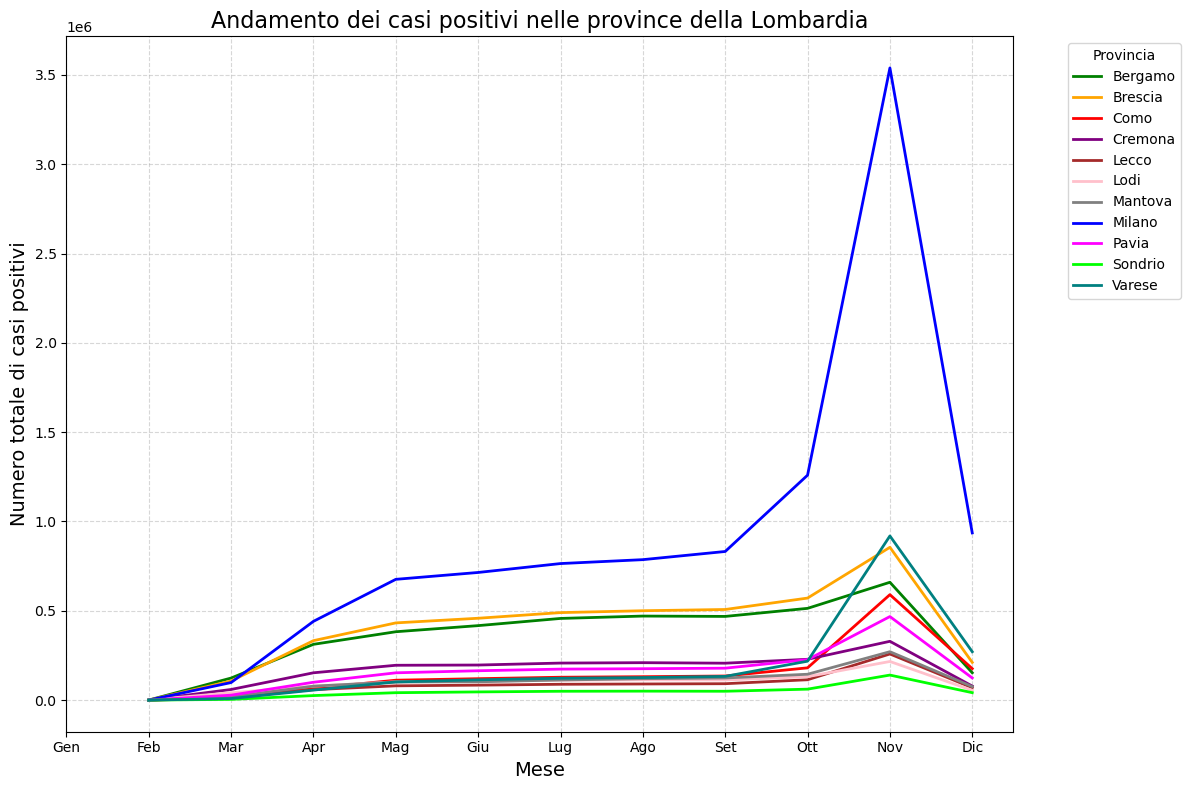

In [17]:
# Definisci un dizionario che associa ogni città a un colore specifico
province_interesse = ['Bergamo', 'Brescia', 'Como', 'Cremona', 'Lecco', 'Lodi', 'Mantova', 
                      'Milano', 'Monza e Brianza', 'Pavia', 'Sondrio', 'Varese']

# Seleziona solo le righe relative alle province specificate
df_province_interesse = df_province[df_province['ProvinceName'].isin(province_interesse)]

colori_citta = {
    'Milano': 'blue',
    'Brescia': 'orange',
    'Bergamo': 'green',
    'Como': 'red',
    'Cremona': 'purple',
    'Lecco': 'brown',
    'Lodi': 'pink',
    'Mantova': 'gray',
    'Monza e Brianza': 'cyan',
    'Pavia': 'magenta',
    'Sondrio': 'lime',
    'Varese': 'teal'
}
# Estrai il mese dalla data
df_province_interesse['Month'] = df_province_interesse['DateProvince'].dt.month

# Raggruppa i dati per mese e provincia e calcola il totale dei casi positivi per ogni mese
casi_per_mese_provincia = df_province_interesse.groupby(['Month', 'ProvinceName'])['TotalPositiveCasesProvince'].sum().unstack()


# Crea il grafico
plt.figure(figsize=(12, 8))
for provincia in casi_per_mese_provincia.columns:
    plt.plot(casi_per_mese_provincia.index, casi_per_mese_provincia[provincia], label=provincia, color=colori_citta.get(provincia, 'black'), linewidth=2)

# Ottieni la lista ordinata delle province basata sulla posizione delle linee nel grafico
province_ordered = [provincia for provincia in casi_per_mese_provincia.columns]

# Ordina la leggenda in base alla lista ordinata delle province
plt.legend(title='Provincia', labels=province_ordered, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Andamento dei casi positivi nelle province della Lombardia', fontsize=16)
plt.xlabel('Mese', fontsize=14)
plt.ylabel('Numero totale di casi positivi', fontsize=14)
plt.xticks(range(1, 13), ['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




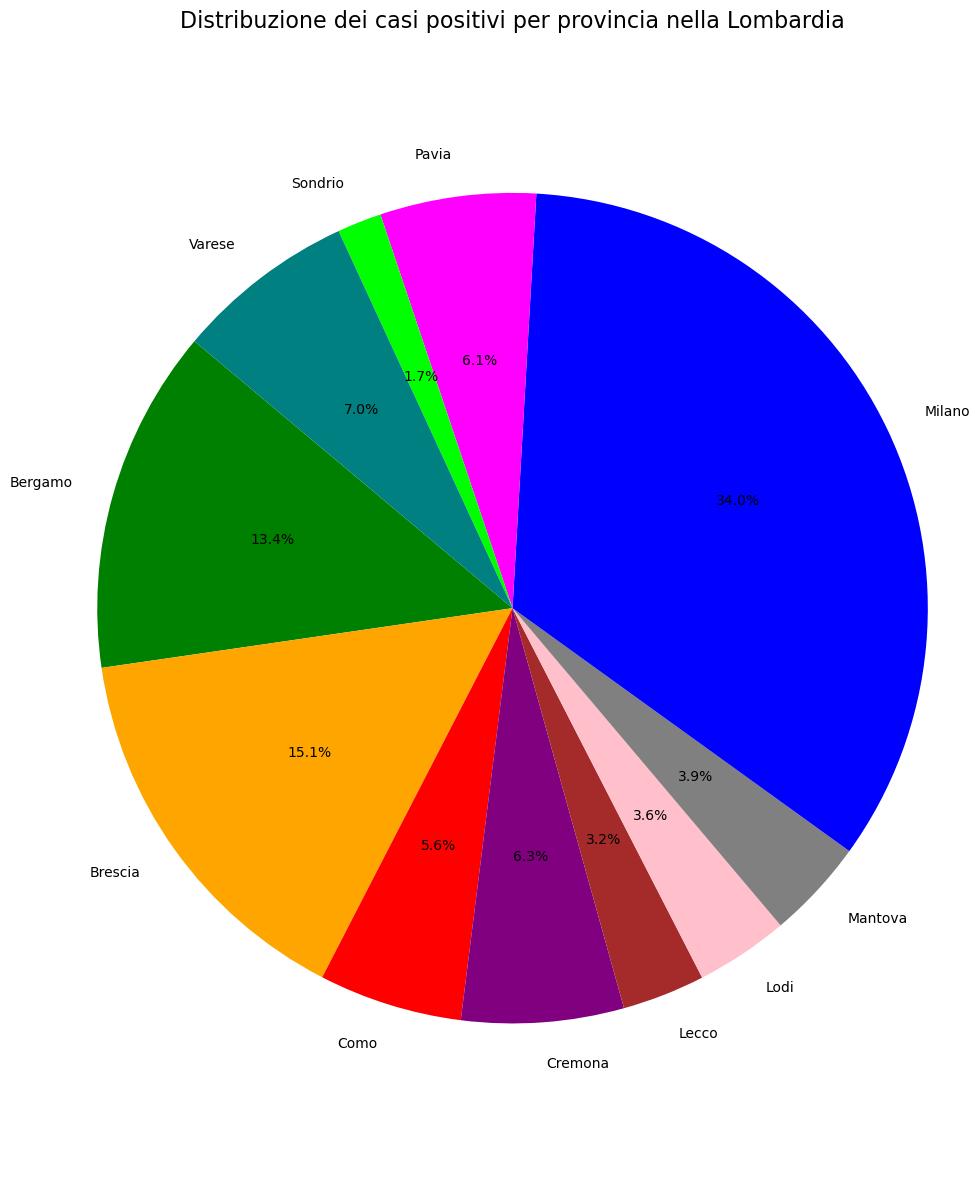

Bergamo: 3958831
Brescia: 4465909
Como: 1649397
Cremona: 1864488
Lecco: 951232
Lodi: 1068513
Mantova: 1148224
Milano: 10047474
Pavia: 1791639
Sondrio: 509600
Varese: 2069573


In [18]:
totale_casi_per_provincia = df_province_interesse.groupby('ProvinceName')['TotalPositiveCasesProvince'].sum()

plt.figure(figsize=(10, 12))
plt.pie(totale_casi_per_provincia, labels=totale_casi_per_provincia.index, autopct='%1.1f%%', startangle=140, colors=[colori_citta.get(provincia, 'gray') for provincia in totale_casi_per_provincia.index])
plt.title('Distribuzione dei casi positivi per provincia nella Lombardia', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

for provincia, percentuale in zip(totale_casi_per_provincia.index, totale_casi_per_provincia):
    print(f"{provincia}: {percentuale:.0f}")

# Creazione di un DataFrame per le percentuali
percentuali_df = pd.DataFrame({'Provincia': totale_casi_per_provincia.index, 'Percentuale': totale_casi_per_provincia.values})

# Salvataggio del DataFrame in un file CSV
percentuali_df.to_csv('percentuali_per_provincia.csv', index=False)


In [19]:
# Lista dei capoluoghi di regione italiane, escludendo Milano, Brescia e Bergamo
altre_citta = ['Torino', 'Venezia', 'Trieste', 'Genova', 'Bologna', 'Firenze', 'Ancona', 'Campobasso', 'Napoli', 'Bari', 'Potenza', 'Roma', 'L\'Aquila', 'Cagliari', 'Palermo', 'Sassari', 'Catanzaro', 'Trento', 'Perugia']

# Seleziona solo le righe relative alle altre città
df_altre_citta = df_comuni[df_comuni['Denominazione'].isin(altre_citta)]

# Calcola la media della popolazione per il 2011 delle altre città
media_altre_citta = df_altre_citta['Popolazione2011'].mean()

# Seleziona solo le righe relative a Milano, Brescia e Bergamo
df_milano_brescia_bergamo = df_comuni[df_comuni['Denominazione'].isin(['Milano', 'Brescia', 'Bergamo'])]

# Ottieni i valori di popolazione per Milano, Brescia e Bergamo
popolazione_milano = df_milano_brescia_bergamo[df_milano_brescia_bergamo['Denominazione'] == 'Milano']['Popolazione2011'].values[0]
popolazione_brescia = df_milano_brescia_bergamo[df_milano_brescia_bergamo['Denominazione'] == 'Brescia']['Popolazione2011'].values[0]
popolazione_bergamo = df_milano_brescia_bergamo[df_milano_brescia_bergamo['Denominazione'] == 'Bergamo']['Popolazione2011'].values[0]

# Stampa i valori comparativi
print(" Milano", popolazione_milano)
print(" Brescia ", popolazione_brescia)
print("Bergamo", popolazione_bergamo)
print("Media basata sui capoluoghi di regione", media_altre_citta)


 Milano 1242123.0
 Brescia  189902.0
Bergamo 115349.0
Media basata sui capoluoghi di regione 398043.22222222225


           Milan       Rome    Average
month                                 
1       5.888889   8.500000   7.194444
2       6.111111  10.611111   8.361111
3      11.888889  10.777778  11.333333
4      12.277778  13.611111  12.944444
5      10.611111  10.111111  10.361111
6      22.722222  23.500000  23.111111
7      18.166667  24.444444  21.305556
8      22.388889  24.388889  23.388889
9      21.833333  22.333333  22.083333
10     15.722222  18.777778  17.250000
11      7.000000  17.000000  12.000000
12      5.888889  11.666667   8.777778


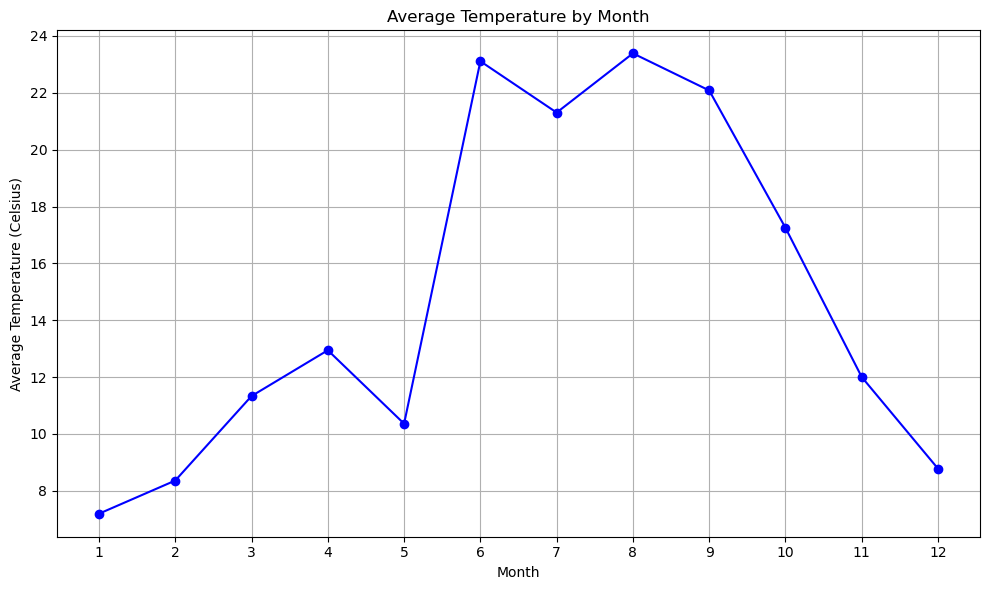

In [20]:
# Carico il dataset delle temperature medie per evidenziare la correlazione con l'andamento di Covid
df_temperature = pd.read_csv("Temperature2019.csv")

# Imposto la colonna 'month' come indice
df_temperature.set_index('month', inplace=True)

# Converti Fahrenheit in Celsius
df_temperature['Milan'] = (df_temperature['Milan'] - 32) * 5/9
df_temperature['Rome'] = (df_temperature['Rome'] - 32) * 5/9

# Calcola la media tra le temperature di Milano e Roma per ogni mese
df_temperature['Average'] = (df_temperature['Milan'] + df_temperature['Rome']) / 2

print(df_temperature)

# Crea il grafico
plt.figure(figsize=(10, 6))
plt.plot(df_temperature.index, df_temperature['Average'], marker='o', color='b', linestyle='-')

# Aggiungi etichette e titoli
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.xticks(df_temperature.index)  # Imposta i ticks sull'asse x ai valori degli indici (mesi)

# Mostra il grafico
plt.grid(True)
plt.tight_layout()
plt.show()

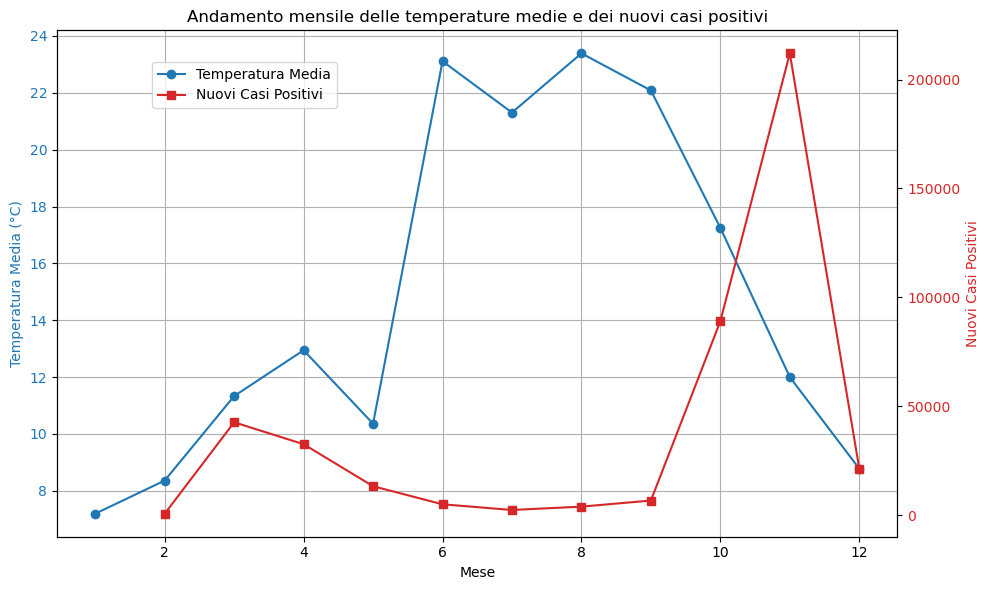

In [21]:
# Crea una figura e gli assi principali
fig, ax1 = plt.subplots(figsize=(10, 6))

# Grafico delle temperature medie (sull'asse y a sinistra)
color = 'tab:blue'
ax1.set_xlabel('Mese')
ax1.set_ylabel('Temperatura Media (°C)', color=color)
ax1.plot(df_temperature.index, df_temperature['Average'], marker='o', color=color, linestyle='-', label='Temperatura Media')
ax1.tick_params(axis='y', labelcolor=color)

# Crea un secondo asse y (sull'asse y a destra)
ax2 = ax1.twinx()  

# Grafico dei nuovi casi positivi (sull'asse y a destra)
color = 'tab:red'
ax2.set_ylabel('Nuovi Casi Positivi', color=color)  
ax2.plot(casi_per_mese.index, casi_per_mese.values, marker='s', color=color, linestyle='-', label='Nuovi Casi Positivi')
ax2.tick_params(axis='y', labelcolor=color)

# Aggiungi una griglia
ax1.grid(True)

# Titolo e legenda
plt.title('Andamento mensile delle temperature medie e dei nuovi casi positivi')
fig.tight_layout()  
fig.legend(loc="upper left", bbox_to_anchor=(0.15,0.9))

# Visualizza il grafico
plt.show()


                  Regione   Sesso   ETA1     Eta Stato civile  TIME  \
0                  Italia  totale  TOTAL  totale       totale  2023   
1              Nord-ovest  totale  TOTAL  totale       totale  2023   
2                Piemonte  totale  TOTAL  totale       totale  2023   
3           Valle d'Aosta  totale  TOTAL  totale       totale  2023   
4                 Liguria  totale  TOTAL  totale       totale  2023   
5               Lombardia  totale  TOTAL  totale       totale  2023   
6                Nord-est  totale  TOTAL  totale       totale  2023   
7     Trentino-Alto Adige  totale  TOTAL  totale       totale  2023   
8                  Veneto  totale  TOTAL  totale       totale  2023   
9   Friuli-Venezia Giulia  totale  TOTAL  totale       totale  2023   
10         Emilia-Romagna  totale  TOTAL  totale       totale  2023   
11                 Centro  totale  TOTAL  totale       totale  2023   
12                Toscana  totale  TOTAL  totale       totale  2023   
13    

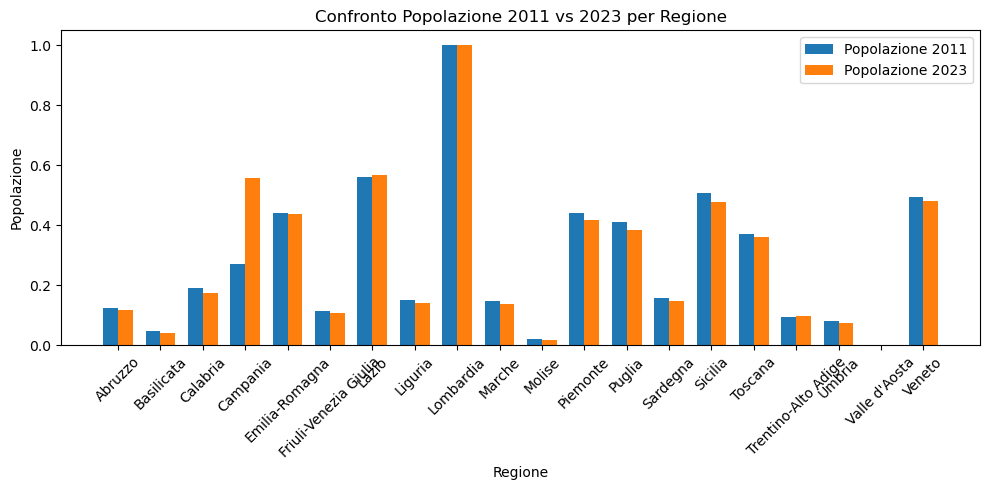

In [22]:

df_regioni_divisi2011 = df_comuni.groupby('Regione')['Popolazione2011'].sum().reset_index()
df_regioni2023 = pd.read_csv('Popolazione_Italia_2023.csv')
# Rinominiamo le colonne del DataFrame popolazione_2023
popolazione2023 = df_regioni2023.rename(columns={'Territorio': 'Regione', 'Value': 'Popolazione2023'})
print(popolazione2023)
# Uniamo i due DataFrame sulla colonna 'Denominazione'
popolazione_completa = pd.merge(df_regioni_divisi2011, popolazione2023, on='Regione')
# Normalizzazione min-max per le colonne di popolazione
popolazione_completa['Popolazione2011'] = (popolazione_completa['Popolazione2011'] - popolazione_completa['Popolazione2011'].min()) / (popolazione_completa['Popolazione2011'].max() - popolazione_completa['Popolazione2011'].min())
popolazione_completa['Popolazione2023'] = (popolazione_completa['Popolazione2023'] - popolazione_completa['Popolazione2023'].min()) / (popolazione_completa['Popolazione2023'].max() - popolazione_completa['Popolazione2023'].min())

# Creiamo il grafico di confronto normalizzato
plt.figure(figsize=(10, 5))

# Impostazione delle larghezze delle barre
bar_width = 0.35

# Grafico a barre per la Popolazione 2011
plt.bar(popolazione_completa.index, popolazione_completa['Popolazione2011'], bar_width, label='Popolazione 2011')

# Grafico a barre per la Popolazione 2023 posizionato accanto al primo
plt.bar(popolazione_completa.index + bar_width, popolazione_completa['Popolazione2023'], bar_width, label='Popolazione 2023')

# Etichette sugli assi e titolo del grafico
plt.xlabel('Regione')
plt.ylabel('Popolazione')
plt.title('Confronto Popolazione 2011 vs 2023 per Regione')
plt.xticks(popolazione_completa.index + bar_width / 2, popolazione_completa['Regione'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()